# Example/Testing for Frequency Domain PN Amplitudes

In [6]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
# %matplotlib auto
%matplotlib inline
# Import useful things
from nrutils import scsearch,gwylm,jf14067295,Mf14067295
from nrutils.core.nrsc import lswfafd
from nrutils.generate import pn
# Setup plotting backend
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
#
from numpy import *
from numpy.linalg import pinv
#
from scipy.optimize import minimize
#
import pickle
import lalsimulation as lalsim

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load NR data and compare inpiral to PN code fr different modes

In [7]:
# Find Simulation
A = scsearch(q=8,institute='bam',verbose=True)

(scsearch)>> Found institute (='bam') keyword.
(scsearch)>> Found q (=8) keyword.
(scsearch)>> Found verbose (=True) keyword.
## Found 31 possibly degenerate simulations:
[0001][silures] BAM: 1chi0.80-saa-q8.00	(q8a0am08_T_64_336)
[0002][silures] BAM: 1chi0.80-sa-q8.00	(q8a0a08_c0.45_80)
[0003][silures] BAM: 1chi0.80-sa-q8.00	(q8a0a08_c0.25_80)
[0004][silures] BAM: 1chi0.80-sa-q8.00	(q8a0a08_c0.25_100)
[0005][silures] BAM: 1chi0.85-2chi0.85-saa-q8.00	(q8am085v6D10_96c025)
[0006][silures] BAM: 1chi0.85-2chi0.85-saa-q8.00	(q8am085v6D10_96)
[0007][silures] BAM: 1chi0.85-2chi0.85-saa-q8.00	(q8am085v6D10)
[0008][silures] BAM: ns-q8.00	(q8a0a0c05_T_80_420)
[0009][silures] BAM: ns-q8.00	(q8a0a0c035_T_80_420)
[0010][silures] BAM: ns-q8.00	(q8a0a0_T_96_504n512)
[0011][silures] BAM: ns-q8.00	(q8a0a0_T_80_420)
[0012][silures] BAM: ns-q8.00	(q8a0a0_T_112_588n768)
[0013][silures] BAM: 1chi0.85-2chi0.85-sa-q8.00	(q8++0.85_T_80_200_-4pc)
[0014][silures] BAM: 1chi0.75-p-q8.00	(q8_0_0_0_0_-75_0Def_T_96

In [3]:
# Select desired simulation
a = A[23]

In [5]:
# Load waveform data
lmlist = [ (2,2), (2,1), (3,3), (3,2), (4,4), (4,3) ]
y = gwylm( a, lm=lmlist, verbose=True, clean=True )

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found dt (=0.15) keyword.
(gwylm)>> Found lm (=[(2, 2), (2, 1), (3, 3), (3, 2), (4, 4), (4, 3)]) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x1144c7cb0>) keyword.
(gwylm)>> Found verbose (=True) keyword.
['/raid/data/ReducedData/', '/Users/book/MOUNT/tmp/raid/data/ReducedData', '/']
q8S0/q8a0a0_T_112_588n768/


TypeError: can only concatenate list (not "str") to list

## Compare PN amplitude to NR amplitde for a select multipole

/Users/book/JOKI/Libs/KOALA/nrutils_dev/nrutils/generate/pn.py:38: RuntimeWarning: invalid value encountered in sqrt
  ans = abs( sqrt(pi) * Atime / sqrt( 1.5*sqrt(x)*XdotT4(x,eta,X1z,X2z) ) )


/Library/Python/2.7/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


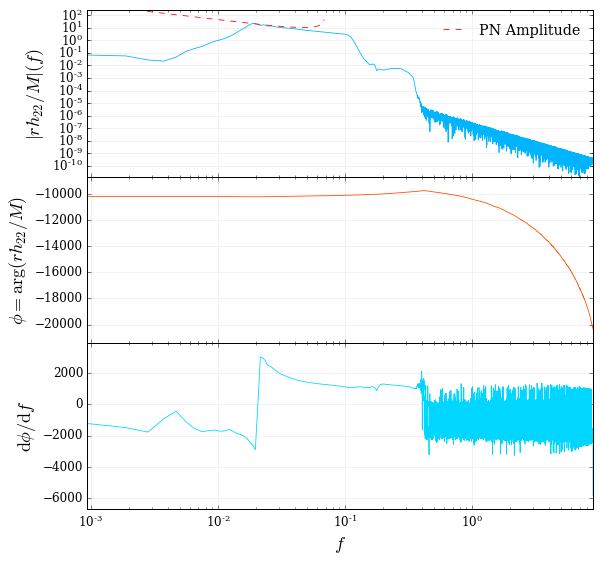

In [32]:
# select multipole l and m
mode = (2,2)
# Plot frequency domain waveform data
ax,fig = y.lm[mode]['strain'].plot(domain='freq')
# Add the PN amplitude to the plot 
f = y.lm[mode]['strain'].f; f = f[ f>0 ]
hfpn_amp = pn.hf_amp_np( f, y.eta, y.X1[-1], y.X2[-1], mode )
ax[0].plot( f, hfpn_amp, '--r', label='PN Amplitude' )
ax[0].legend(frameon=False)

## Comapre PN with NR for all Loaded multipoles

In [33]:
# Add the PN amplitude to the plot 
pn_alm = {}
for mode in y.lm:
    f = y.lm[mode]['strain'].f; f = f[ f>0 ]
    pn_alm[mode] = pn.hf_amp_np( f, y.eta, y.X1[-1], y.X2[-1], mode )

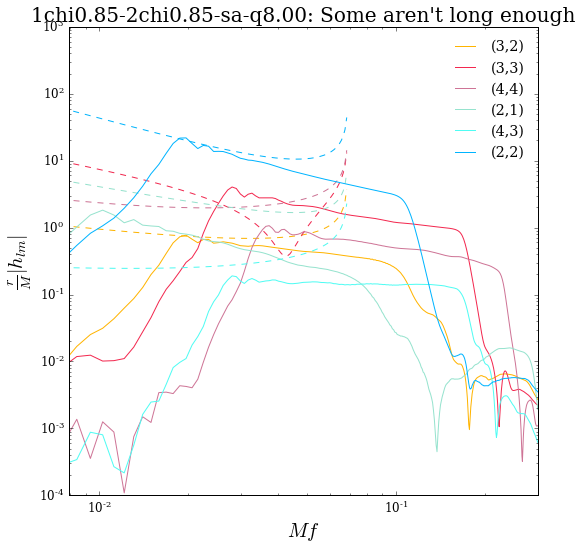

In [34]:
fig = figure( figsize = 1.68*array([5,5]) )
clr = rgb( len(y.lm), reverse=True,  )
for k,mode in enumerate(y.lm):
    hlm = y.lm[mode]['strain']
    f = hlm.f; mask = f>0
    plot( f[mask], hlm.fd_amp[mask], color=clr[k], linewidth=1, label='(%i,%i)'%mode  )
    plot( f[mask], pn_alm[mode], color=0.99*clr[k], linestyle='--', linewidth=1)
#
xscale('log'); yscale('log')
xlim( [y.wstart/(4*pi),0.3] )
ylim( [1e-4,1e3] )
xlabel('$Mf$')
ylabel(r'$\frac{r}{M}|h_{lm}|$')
legend(frameon=False)
title('%s: Some aren\'t long enough'%y.label)
# savefig('pn_amplitude_example.png')